<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Reto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# import libraries
import numpy as np
import os
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D,Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [23]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
# Show the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
# see first character
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [26]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
# Normalize images
x_train = x_train/255
x_test = x_test/255

In [28]:
# Build the model
modelo = Sequential()
modelo.add(Input(shape=(28,28,1))) #Input layer
modelo.add(Convolution2D(64, kernel_size=3)) #We are going to generate 64 convolutions
modelo.add(MaxPooling2D(strides=(2,2))) #Pooling layer (reduce dimension)
modelo.add(Convolution2D(32, kernel_size=3)) #Vamos a generar 32 convoluciones
modelo.add(MaxPooling2D(strides=(2,2))) #Pooling layer (reduce dimension)
modelo.add(Flatten()) #Flatten
modelo.add(Dense(10, activation="softmax"))

In [29]:
#summary
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [30]:
#compile the model
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
# Train the model
modelo.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3066 - accuracy: 0.9147 - val_loss: 0.1040 - val_accuracy: 0.9696
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0945 - accuracy: 0.9716 - val_loss: 0.0656 - val_accuracy: 0.9813
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0570 - val_accuracy: 0.9831
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0478 - val_accuracy: 0.9839
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0532 - val_accuracy: 0.9832
Epoch 

In [32]:
# Evaluate the model
evaluacion = modelo.evaluate(x_test, y_test)
print(evaluacion)

313/313 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9841
[0.04920688271522522, 0.9840999841690063]


In [33]:
# Predictions
prediccion = modelo.predict(x_test)
reales = np.argmax(y_test, axis=1)
prediccion = np.argmax(prediccion, axis=1)

313/313 [==============================] - 1s 2ms/step


In [34]:
# display ranking metrics
print(classification_report(reales, prediccion))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



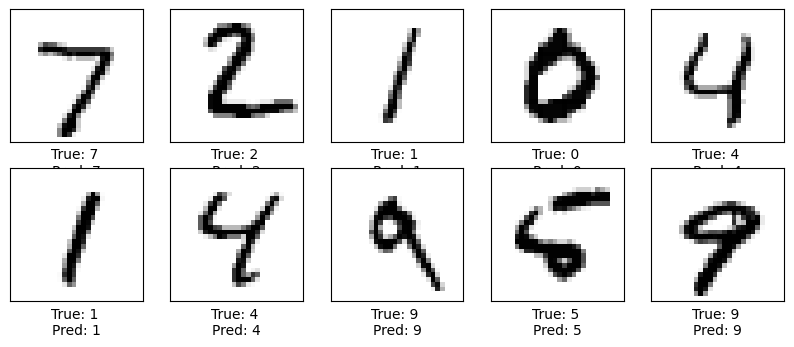

In [37]:
# # Feature to display images along with predictions
# Función para mostrar imágenes junto con las predicciones
def plot_images(images, labels, predictions, index, num=10):
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[index + i], cmap=plt.cm.binary)
        plt.xlabel(f'True: {labels[index + i]} \nPred: {predictions[index + i]}')
    plt.show()

# Mostrar las primeras 10 imágenes de prueba con sus predicciones
plot_images(x_test, reales, prediccion, 0, num=10)